https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset?resource=download

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r'Bank Customer Churn Prediction.csv')
dataset

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# EDA

In [3]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
dataset['customer_id'].duplicated().any()

False

Tidak ditemukan data duplicate

In [6]:
df = dataset.copy()
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Univariate Analysis

In [7]:
numerical = ['credit_score', 'age', 'balance','tenure','estimated_salary']
numerical = df[numerical].columns
numerical

Index(['credit_score', 'age', 'balance', 'tenure', 'estimated_salary'], dtype='object')

In [8]:
categorial1 = ['country','gender','products_number']
categorial1 = df[categorial1].columns
categorial1

Index(['country', 'gender', 'products_number'], dtype='object')

In [9]:
categorial2 = ['credit_card','active_member','churn']
categorial2 = df[categorial2].columns
categorial2

Index(['credit_card', 'active_member', 'churn'], dtype='object')

In [10]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 10
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

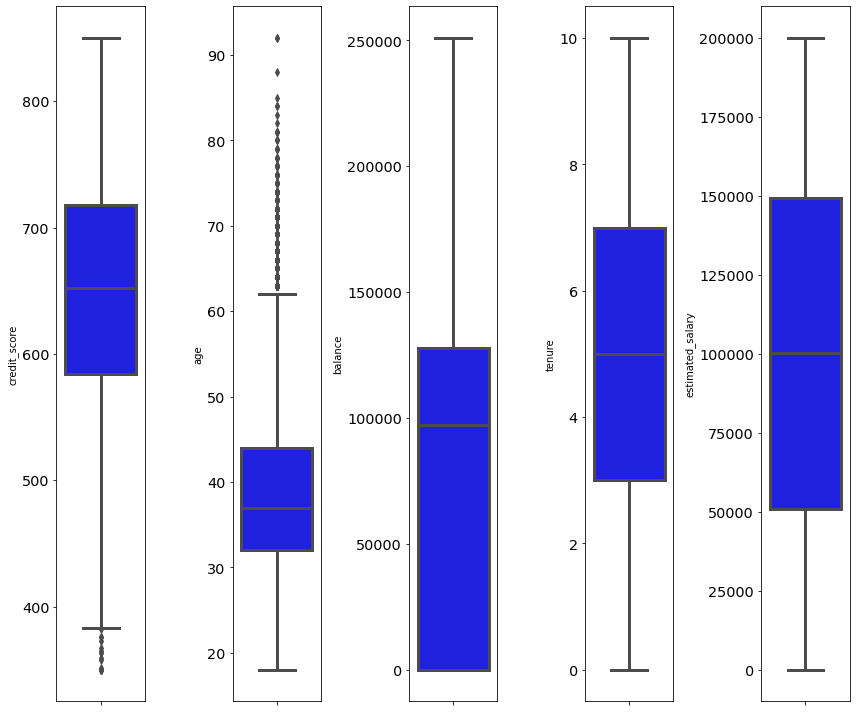

In [11]:
for i in range(0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.boxplot(y= df[numerical[i]], color='blue', orient='v')
    plt.tight_layout()

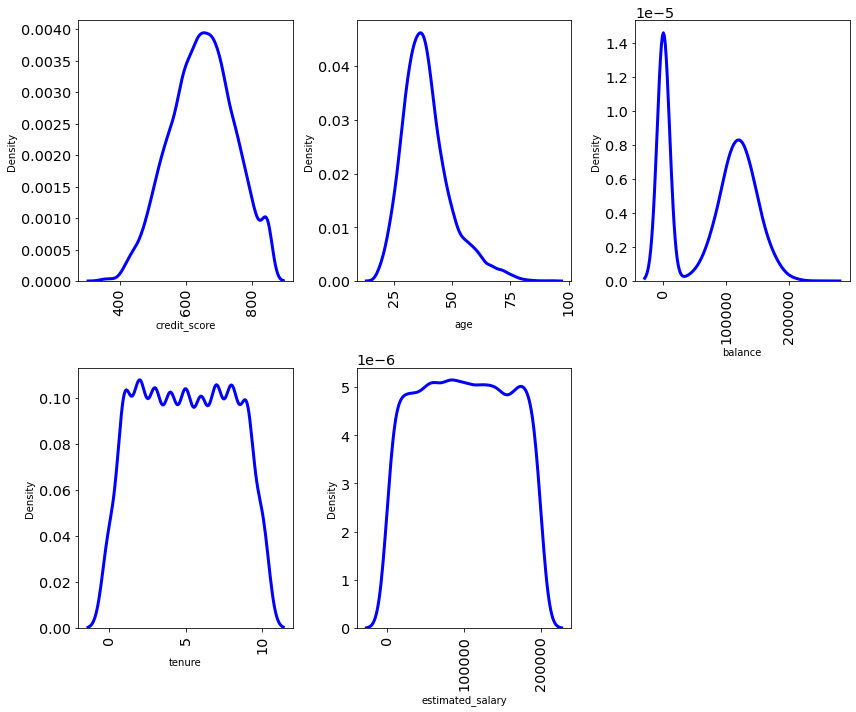

In [12]:
for i in range (0,len(numerical)):
    plt.subplot(2,3, i+1)
    sns.kdeplot(x=df[numerical[i]], color='blue')
    plt.xlabel(numerical[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

* Balance merupakan saldo yang ada di dalam akun (USD).
* Tenure merupakan rentang waktu setelah customer memiliki rekening di Bank AFS (tahun)
* Estimated salary merupakan rekening gaji

Dari ke 5 fitur di atas, credit_score, tenure, estimated salary tergolong normal distribution,
                         balance tergolong bimodial,
                         age tergolong positif distribution.


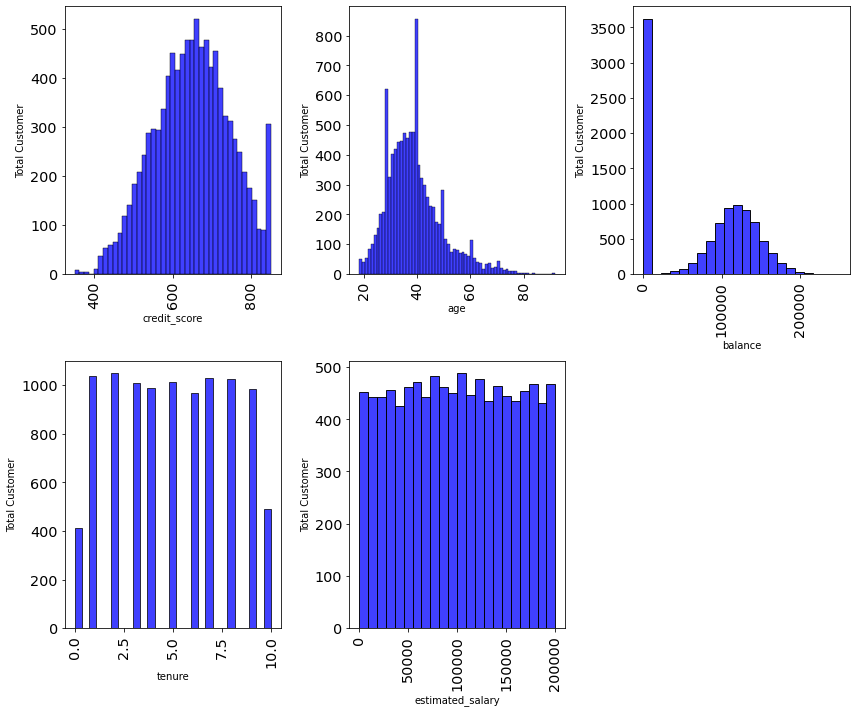

In [13]:
for i in range (0,len(numerical)):
    plt.subplot(2,3, i+1)
    sns.histplot(x=df[numerical[i]], color='blue')
    plt.xlabel(numerical[i])
    plt.xticks(rotation=90)
    plt.ylabel('Total Customer')
    plt.tight_layout()

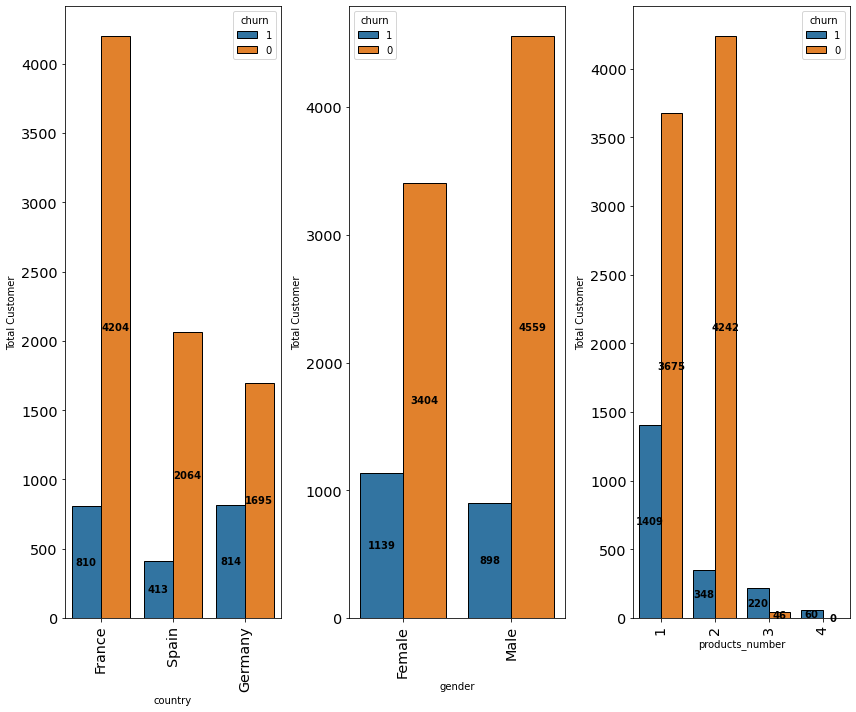

In [14]:
for i in range (0, len(categorial1)):
    plt.subplot(1,len(categorial1),i+1)
    ax=sns.countplot(x= df[categorial1[i]], hue=df['churn'], hue_order=[1, 0], edgecolor='black')
    plt.xticks(rotation=90)
    for label in ax.containers:
        ax.bar_label(label, fontweight='bold', label_type='center')
    plt.ylabel('Total Customer')
    plt.tight_layout()

Customer yang paling banyak menyimpan uangnya di Bank AFS adalah customer yang berasal dari negara Prancis, namun customer yang bertahan dari negara itu hanya 19% dari 4204 customer prancis. Customer dengan gender pria merupakan customer yang paling banyak mendaftar di Bank AFS, namun yang masih bertahan (tidak churn) didominasi oleh customer wanita. 

Untuk product_number, 1 merupakan kredit, 2 transfer, 3 Safe Deposit Box, 4 Bank Card. (https://www.ruangguru.com/blog/macam-macam-produk-bank)

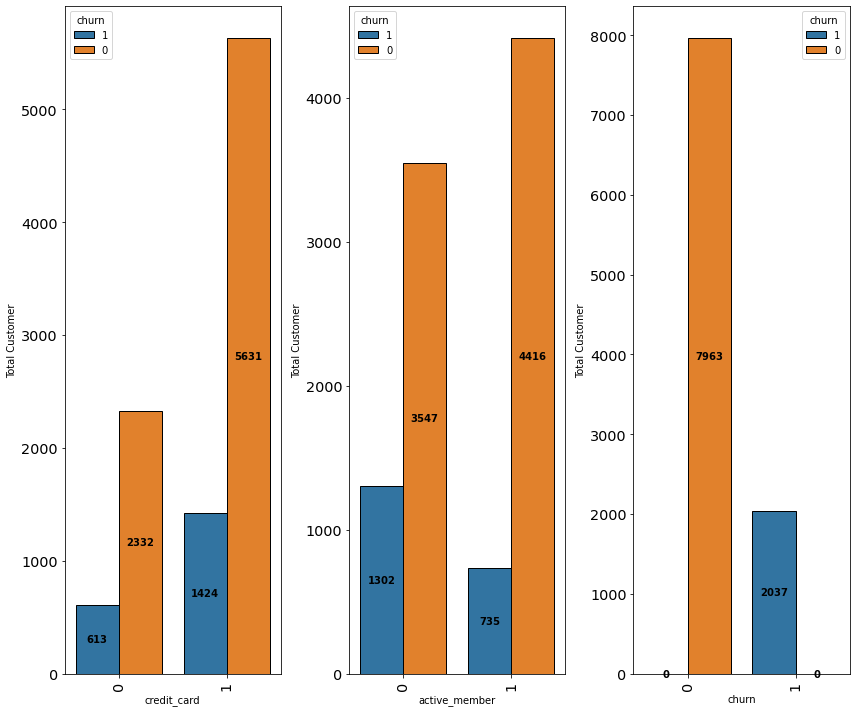

In [15]:
for i in range (0, len(categorial2)):
    plt.subplot(1,len(categorial2),i+1)
    ax= sns.countplot(x= df[categorial2[i]], hue=df['churn'], hue_order=[1, 0], edgecolor='black')
    plt.xticks(rotation=90)
    for label in ax.containers:
        ax.bar_label(label, fontweight='bold', label_type='center')
    plt.ylabel('Total Customer')
    plt.tight_layout()

## Multvariate Analysis

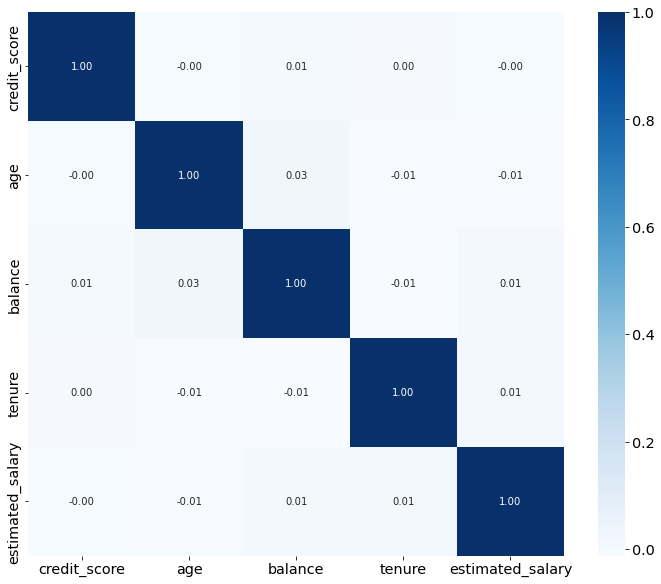

In [16]:
sns.heatmap(df[numerical].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.show()

tidak ditemukannya korelasi di antara fitur fitur numerical.

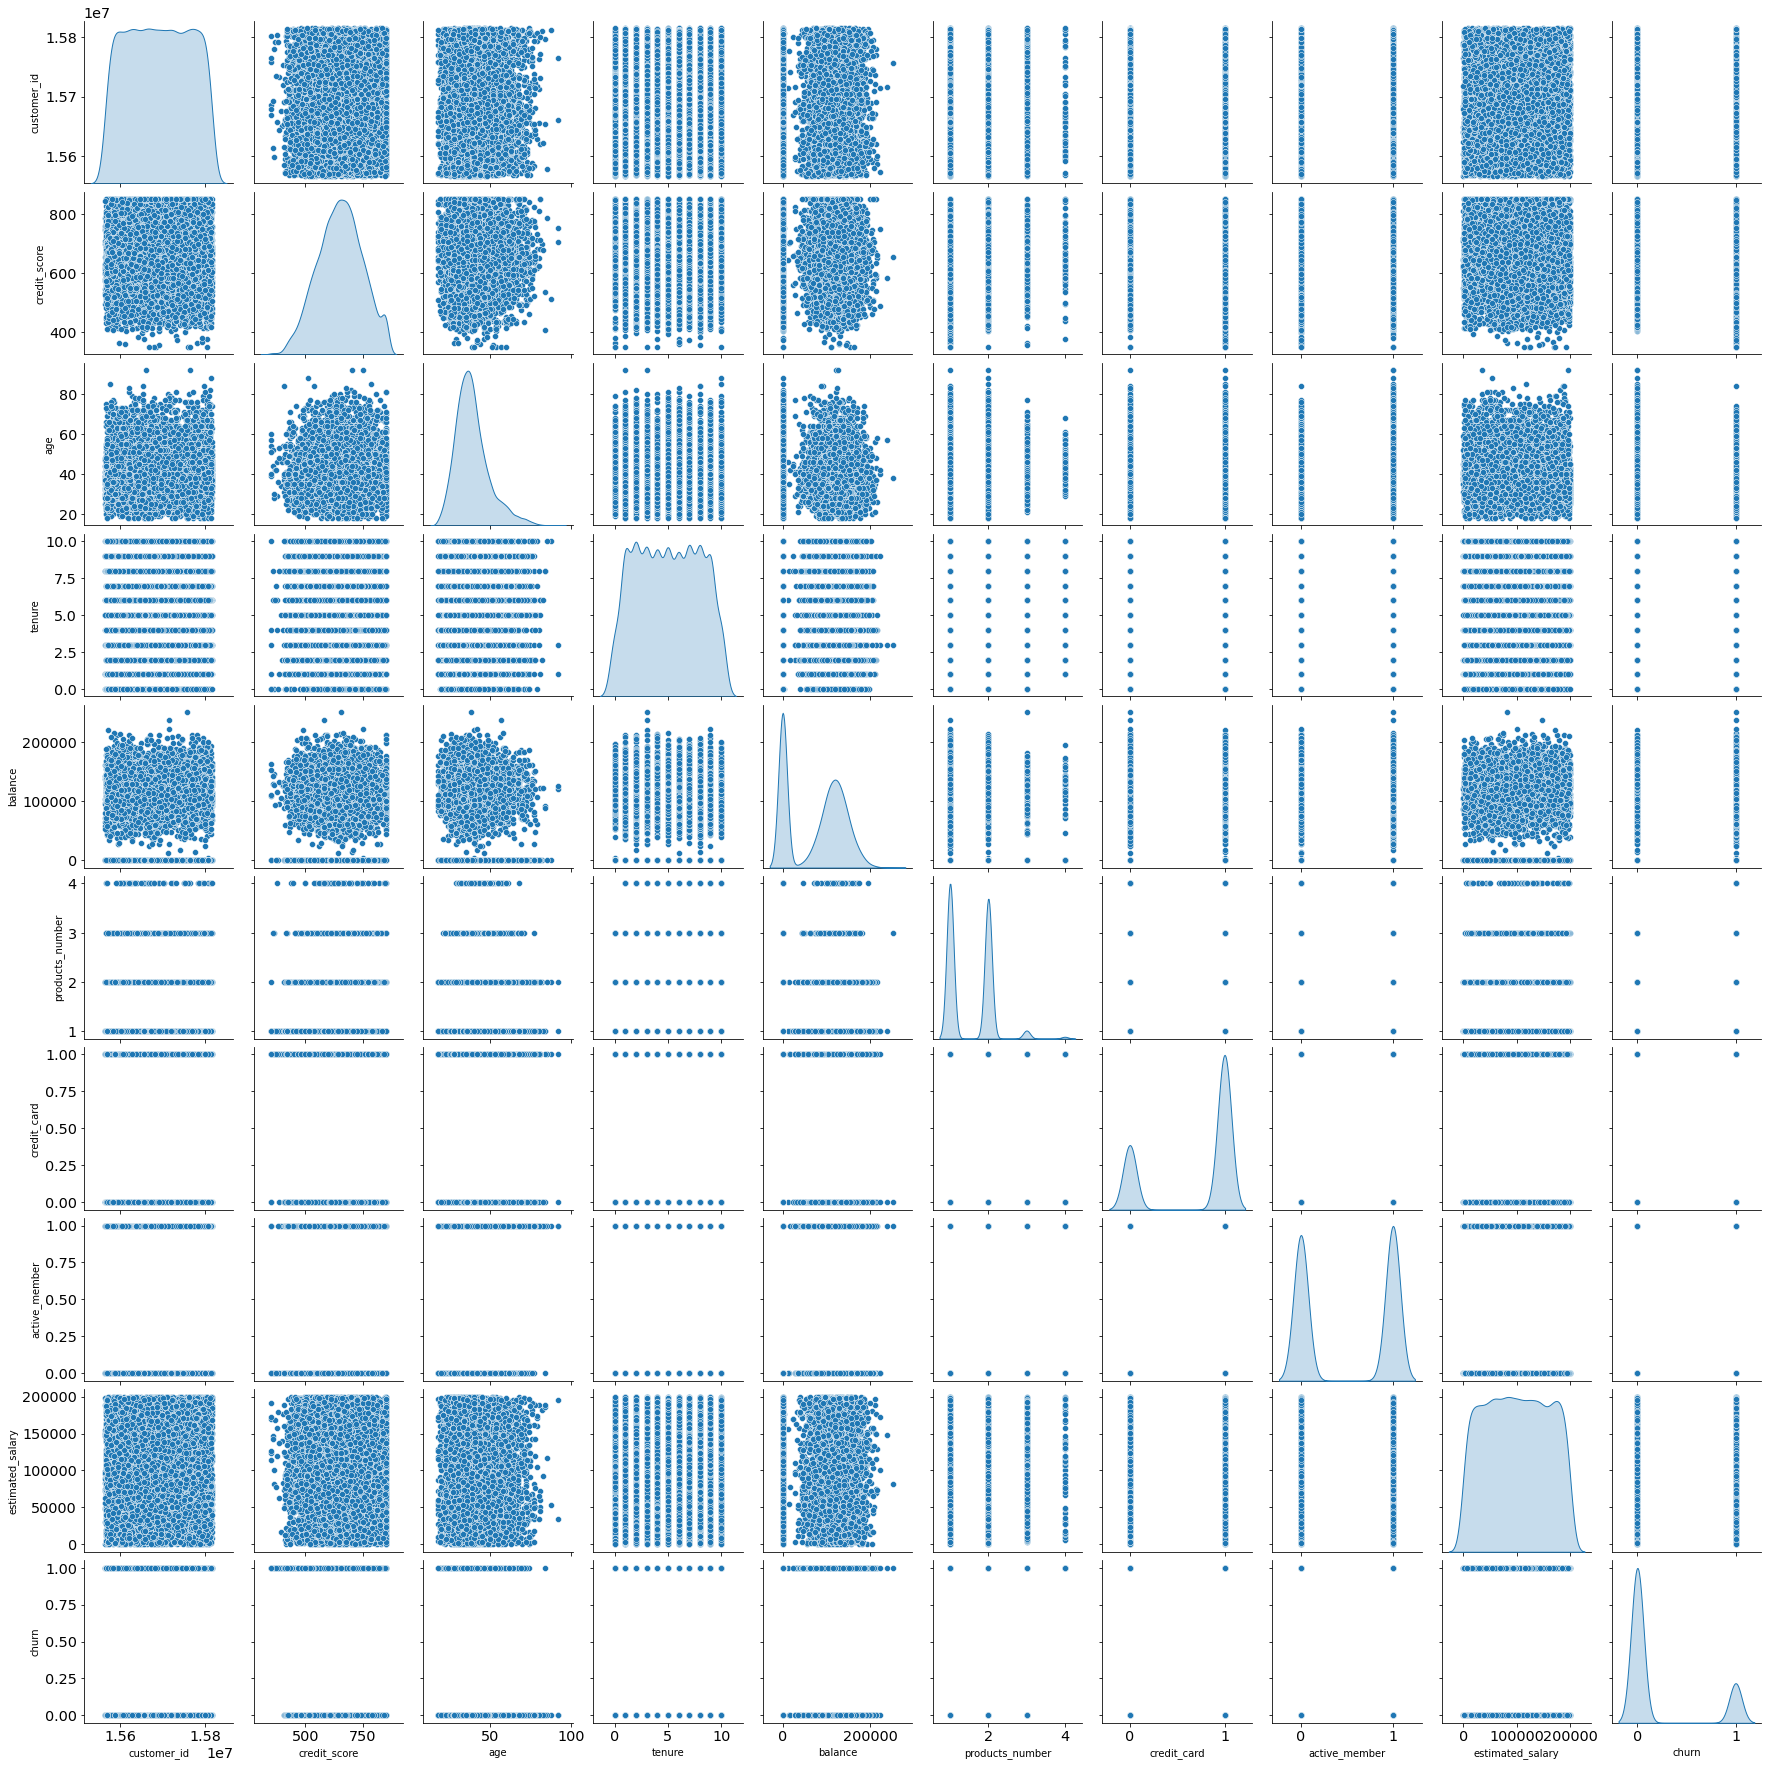

In [17]:
sns.pairplot(df, diag_kind='kde')
plt.show()

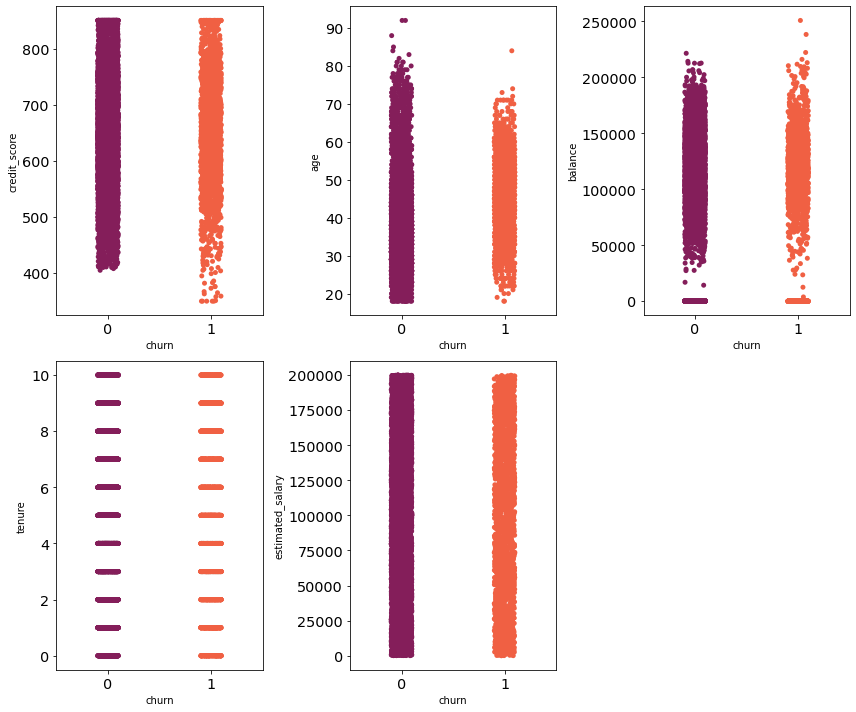

In [18]:
import warnings
warnings.filterwarnings('ignore')
for i in range(0, len(numerical)): # untuk setiap kolom numerik
    plt.subplot(2, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(data=df, x='churn', y=numerical[i], palette='rocket') # gambar catplot/stripplotnya
    plt.tight_layout()

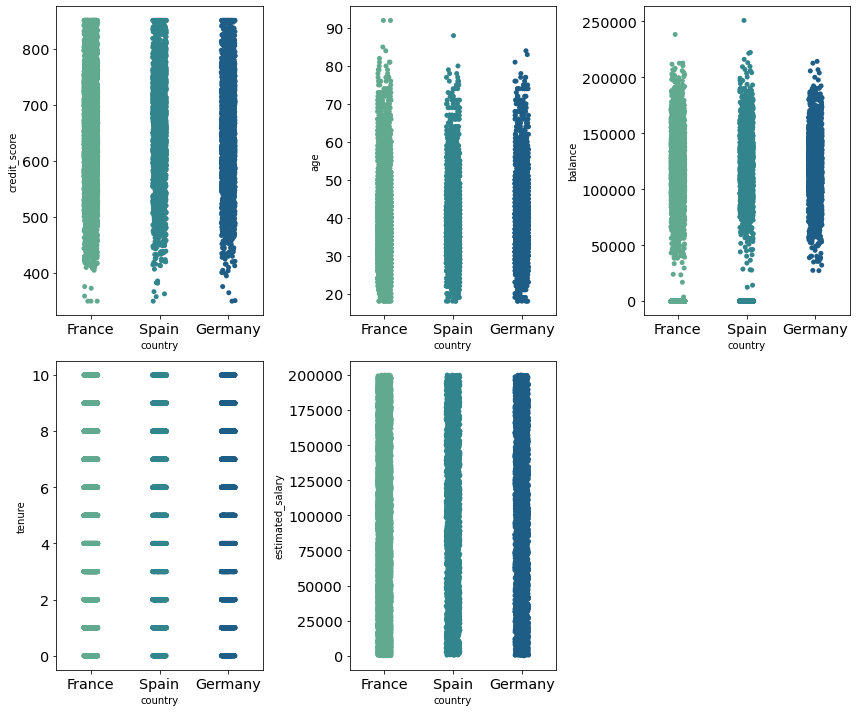

In [19]:
import warnings
warnings.filterwarnings('ignore')
for i in range(0, len(numerical)): # untuk setiap kolom numerik
    plt.subplot(2, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(data=df, x='country', y=numerical[i], palette='crest') # gambar catplot/stripplotnya
    plt.tight_layout()

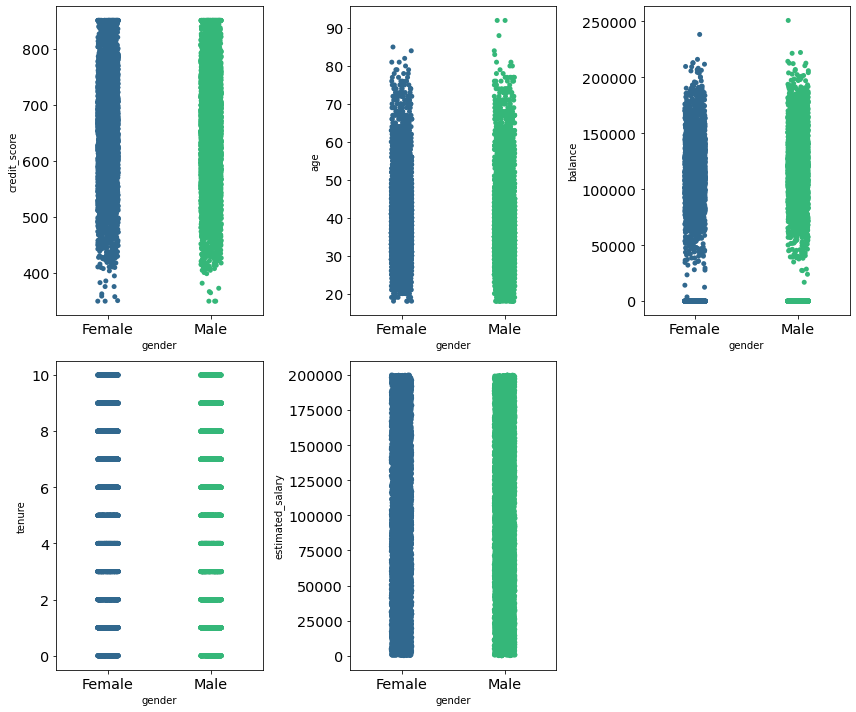

In [20]:
import warnings
warnings.filterwarnings('ignore')
for i in range(0, len(numerical)): # untuk setiap kolom numerik
    plt.subplot(2, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(data=df, x='gender', y=numerical[i], palette='viridis') # gambar catplot/stripplotnya
    plt.tight_layout()

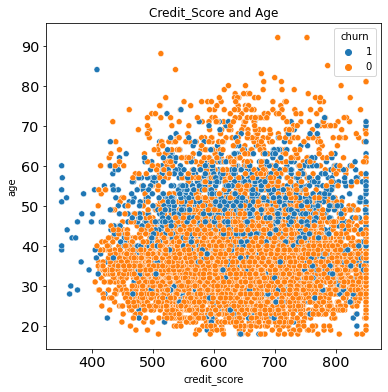

In [21]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='credit_score', y='age', data=df, hue='churn', hue_order=[1,0])
plt.title('Credit_Score and Age')
plt.show()

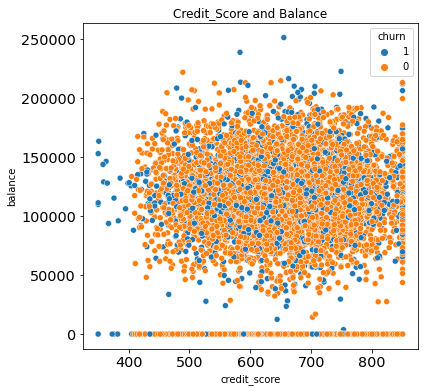

In [22]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='credit_score', y='balance', data=df, hue='churn', hue_order=[1,0])
plt.title('Credit_Score and Balance')
plt.show()

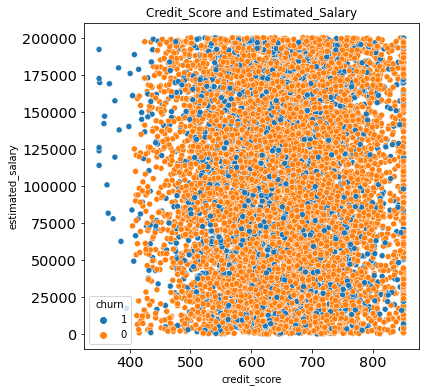

In [23]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='credit_score', y='estimated_salary', data=df, hue='churn', hue_order=[1,0])
plt.title('Credit_Score and Estimated_Salary')
plt.show()

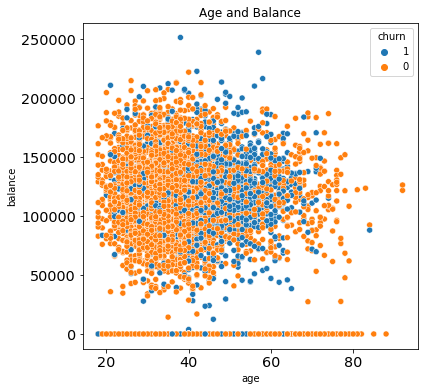

In [24]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='age', y='balance', data=df, hue='churn', hue_order=[1,0])
plt.title('Age and Balance')
plt.show()

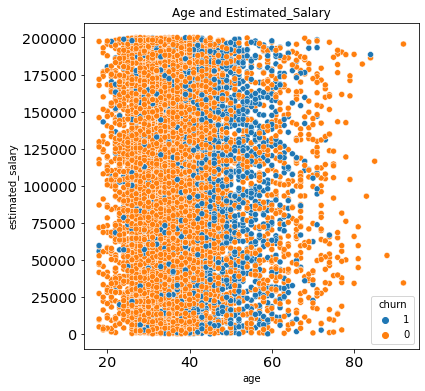

In [25]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='age', y='estimated_salary', data=df, hue='churn', hue_order=[1,0])
plt.title('Age and Estimated_Salary')
plt.show()

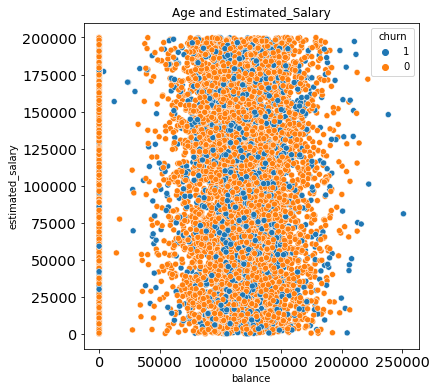

In [26]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='balance', y='estimated_salary', data=df, hue='churn', hue_order=[1,0])
plt.title('Age and Estimated_Salary')
plt.show()

Scatterplot di atas menghubungkan fitur numerical satu sama lain. Insight yang diperoleh adalah customer dengan usia 40-70 tahun merupakan customer yang banyak churn, customer dengan balance(saldo) USD70000 - USD170000 pun merupakan customer yang banyak tergolong churn.


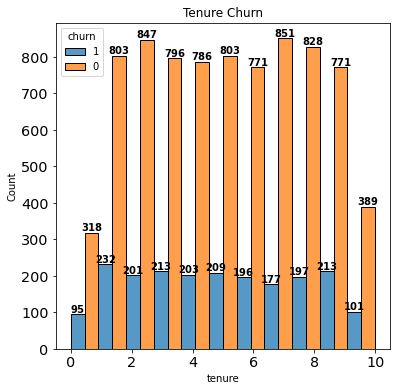

In [38]:
plt.figure(figsize=(6,6))
ax = sns.histplot(x='tenure', data=df, hue='churn', hue_order=[1,0], multiple='dodge', bins=11)
for label in ax.containers:
    ax.bar_label(label, fontweight='bold')
plt.title('Tenure Churn')
plt.show()